# Testbench for `max_pooling2d_w4()`

In [ ]:
#
# Copyright (C) 2024, Advanced Micro Devices, Inc. All rights reserved.
# SPDX-License-Identifier: MIT
#
# Author: Mark Rollins

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import mixed_precision
import numpy as np
import os.path

2024-10-01 14:47:07.390646: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 14:47:07.394505: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-01 14:47:07.403685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 14:47:07.415578: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 14:47:07.419007: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 14:47:07.430254: I tensorflow/core/platform/cpu_feature_gu

## Layer Definition

In [2]:
inputs = keras.Input(shape=(28,28,1),name="input")
x1 = layers.Conv2D(filters=16,kernel_size=3,activation="relu",name="conv2d_w1")(inputs)
x2 = layers.MaxPooling2D(pool_size=2,name="max_pooling2d_w2")(x1)
outputs = layers.Conv2D(filters=64,kernel_size=3,activation="relu",name="conv2d_w3")(x2)
model_stim = keras.Model(inputs=inputs,outputs=outputs)
w1_taps = np.loadtxt('../conv2d_w1/taps_trained.txt')
w1_taps = np.reshape(w1_taps,(3,3,1,16))
w1_taps = (w1_taps.astype("bfloat16")).astype("float32")
w1_bias = np.loadtxt('../conv2d_w1/bias_trained.txt')
w1_bias = (w1_bias.astype("bfloat16")).astype("float32")
w3_taps = np.loadtxt('../conv2d_w3/taps_trained.txt')
w3_taps = np.reshape(w3_taps,(3,3,16,64))
w3_taps = (w3_taps.astype("bfloat16")).astype("float32")
w3_bias = np.loadtxt('../conv2d_w3/bias_trained.txt')
w3_bias = (w3_bias.astype("bfloat16")).astype("float32")
model_stim.set_weights((w1_taps,w1_bias,w3_taps,w3_bias))

In [3]:
model_stim.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_w1 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_w2 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_w3 (Conv2D)              │ (None, 11, 11, 64)     │         9,280 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,440 (36.88 KB)

 Trainable params: 9,440 (36.88 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
inputs = keras.Input(shape=(11,11,64),name="input_layer")
outputs = layers.MaxPooling2D(pool_size=2,name="max_pooling2d_w4")(inputs)
model = keras.Model(inputs=inputs,outputs=outputs)

In [5]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_w4 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Load NMIST Images

In [6]:
# Set batch size and # of batches
BS=1
NB_tst = 4
# Load MNIST database:
(trn_images,trn_labels), (tst_images,tst_labels) = mnist.load_data()
tst_images = tst_images.reshape((10000,28,28,1))
tst_images = tst_images[:NB_tst*BS,:,:,:]
# Extract usable data:
tst_labels = tst_labels[:NB_tst*BS]
tst_images = tst_images.astype("float32") / 255
tst_images = (tst_images.astype("bfloat16")).astype("float32")
tst_inputs = model_stim.predict(tst_images,batch_size=1)
tst_inputs = (tst_inputs.astype("bfloat16")).astype("float32")
use_inputs = np.zeros((4,11,16,64),dtype="float32");
use_inputs[:,:,0:11,:] = tst_inputs

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step


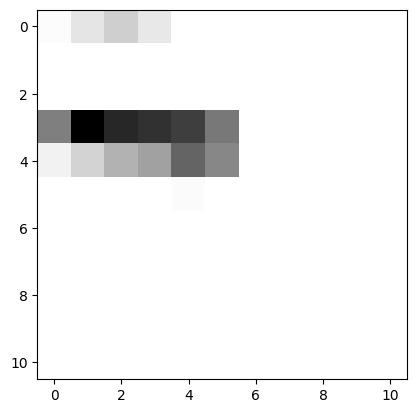

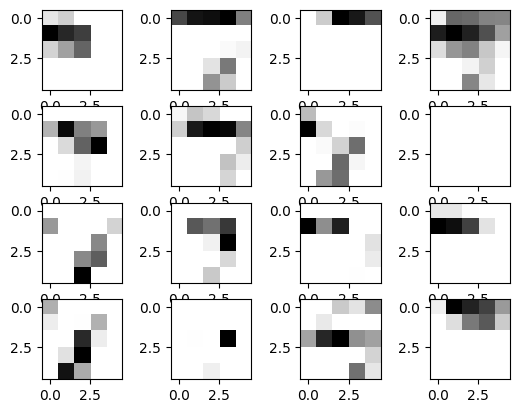

In [7]:
predict = model.predict(tst_inputs,batch_size=1)
predict = (predict.astype("bfloat16")).astype("float32")
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.imshow(tst_inputs[0,:,:,0],cmap=plt.cm.binary)
fig,ax = plt.subplots(nrows=4,ncols=4)
for ii in range(4):
    for jj in range(4):
        ax[ii,jj].imshow(predict[0,:,:,4*ii+jj],cmap=plt.cm.binary)

## Save Layer Inputs

In [8]:
np.savetxt('data/ifm_i.txt',np.reshape(use_inputs,(-1,4)),fmt='%f %f %f %f')
ifm_i = np.reshape(use_inputs,(-1,1))

## Store Layer Outputs

In [9]:
np.savetxt('data/ofm_o.txt',np.reshape(predict,(-1,4)),fmt='%f %f %f %f')
ofm_o = np.reshape(predict,(-1,1))

## Run Vitis Functional Simulation

In [ ]:
import os
import vfs
max_pooling2d_w4_graph = vfs.aieGraph(
    input_file='max_pooling2d_w4_app.cpp',
    part="xcve2802-vsvh1760-2MP-e-S",
    include_paths=['./','../mnist'])
act_o = max_pooling2d_w4_graph.run(vfs.array(ifm_i[:,0],vfs.bfloat16))

(10240,)


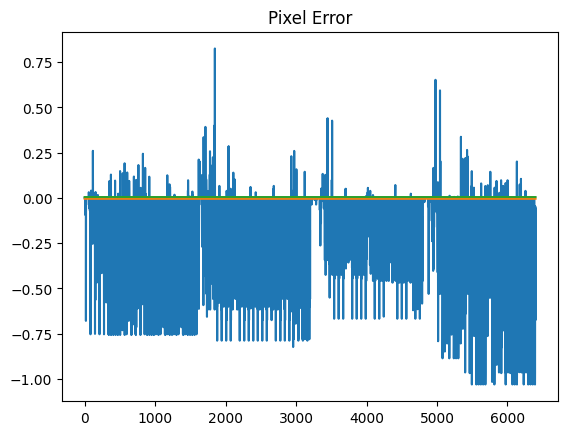

In [19]:
act_o = np.array(act_o)
act_o = np.reshape(act_o,(4,5,8,64))
ofm_o = np.reshape(ofm_o,(4,5,5,64))
act_o = act_o[:,:,:5,:]   # Remove zero pad
err = np.reshape(ofm_o-act_o,(-1,1))
tmp = np.reshape(ofm_o,(-1,1))
lvl = np.max(np.abs(tmp))
lvl_min = -(0.5**8)*lvl*np.ones((len(tmp),1))
lvl_max = +(0.5**8)*lvl*np.ones((len(tmp),1))
tt = np.arange(0,len(tmp))
plt.plot(tt,err,tt,lvl_min,tt,lvl_max)
plt.title("Pixel Error")
plt.show()

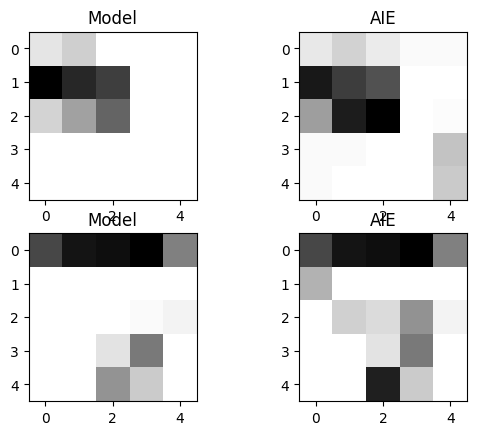

In [20]:
fig,ax = plt.subplots(nrows=2,ncols=2)
for ii in range(2):
    ax[ii,0].set(title="Model")
    ax[ii,1].set(title="AIE")
    ax[ii,0].imshow(ofm_o[0,:,:,ii].astype("float32"),cmap=plt.cm.binary)
    ax[ii,1].imshow(act_o[0,:,:,ii].astype("float32"),cmap=plt.cm.binary)